In [13]:
# Stop Words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/dcorvasce/news-dataset/master/dataset.csv')
df.head()

,news,category
0,b'Longevity Increase Seen Around the World: WHO',health
1,"b'Chikungunya spreading, mosquito-borne virus ...",health
2,b'Family rejects plan to solve medical custody...,health
3,b'FDA proposes program for faster approval of ...,health
4,"b'Red wine, chocolate, grapes may not improve ...",health


In [15]:
df.shape

(426100, 2)

In [16]:
#Identify common words before preprocessing
freq = pd.Series(' '.join(df['news']).split()).value_counts()[:20]
freq

to      109007
the      85343
in       74641
of       70122
for      52165
and      50430
a        40294
on       40013
...'     33753
with     23308
at       22710
The      21849
..."     21543
is       20558
as       18432
To       14881
by       13271
-        12630
be       12569
from     12536
dtype: int64

In [17]:
#TExt Preprocessing
import re
import nltk

nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [18]:
stop_words = set(stopwords.words("english"))

In [ ]:
# Stemming,Lemmatisation

In [19]:
corpus = []
for i in df['news']:
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', i)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation and removing stop words
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [20]:
df['news_processed'] = corpus

In [21]:
#After removing stop words
freq = pd.Series(' '.join(df['news_processed']).split()).value_counts()[:20]
freq

b         429102
x          30200
new        26552
u          22539
n          15035
xe         14477
google     12662
say        12313
year       11315
apple      10668
video      10554
first       9891
get         9055
one         9051
star        9020
report      8955
show        8954
day         8544
may         8539
game        8336
dtype: int64

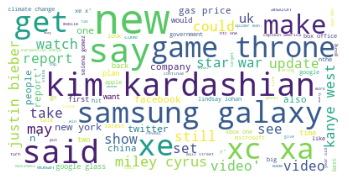

In [15]:
# WOrd cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [22]:
!pip install rake-nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=cbd1c7197f1727dac27bd7c24a104eb98763fb7cca555ccca661ed4a20dfc9f2
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [23]:
from rake_nltk import Rake

In [25]:
r = Rake()

In [26]:
#Example
a=r.extract_keywords_from_text('narendra modi is pm of india and virat kohli is the captaion of india. Covid cases are rapidly increasing in india')
b=r.get_ranked_phrases()
c=r.get_ranked_phrases_with_scores()
print(c)

[(4.0, 'virat kohli'), (4.0, 'rapidly increasing'), (4.0, 'narendra modi'), (4.0, 'covid cases'), (1.0, 'pm'), (1.0, 'india'), (1.0, 'captaion')]


In [27]:
from rake_nltk import Rake
r = Rake()
keywords=[]

for i in df['news']:

  



# To get keyword phrases ranked highest to lowest with scores.
  a=r.extract_keywords_from_text(i)

  b=r.get_ranked_phrases()
  c=r.get_ranked_phrases_with_scores()
  keywords.append(c)



In [34]:
keywords

[[(16.0, 'longevity increase seen around'), (1.0, 'world'), (1.0, 'b')],
 [(4.0, 'national threat'),
  (4.0, 'chikungunya spreading'),
  (4.0, 'borne virus'),
  (1.0, 'viewed'),
  (1.0, 'mosquito'),
  (1.0, 'b')],
 [(16.0, 'solve medical custody dispute'),
  (9.0, 'family rejects plan'),
  (1.0, 'b')],
 [(9.0, 'fda proposes program'),
  (4.0, 'medical devices'),
  (4.0, 'faster approval'),
  (1.0, 'b')],
 [(4.0, 'red wine'),
  (4.0, 'grapes may'),
  (1.0, 'improve'),
  (1.0, 'health'),
  (1.0, 'chocolate'),
  (1.0, 'b')],
 [(16.0, 'study west nile virus'),
  (9.0, 'hospitals form network'),
  (1.0, 'usm'),
  (1.0, 'b')],
 [(16.0, 'afrezza gets fda approval'),
  (9.0, 'improve glycemic control'),
  (4.0, "diabetes ...'"),
  (1.0, 'b'),
  (1.0, 'adults')],
 [(16.0, 'help kick smoking habit'),
  (1.0, 'study'),
  (1.0, 'e'),
  (1.0, 'cigarettes'),
  (1.0, 'b')],
 [(16.0, 'need yearly pelvic exams'),
  (4.0, 'many women'),
  (4.0, 'group says'),
  (1.0, 'doctors'),
  (1.0, 'b')],
 [(25.0, 

In [28]:
df['Key_words'] = keywords

In [29]:
high_ranked_word =[]
for i in range(0,len(keywords)):
  high_ranked_word.append(keywords[i][0][1])


In [30]:
high_ranked_word

['longevity increase seen around',
 'national threat',
 'solve medical custody dispute',
 'fda proposes program',
 'red wine',
 'study west nile virus',
 'afrezza gets fda approval',
 'help kick smoking habit',
 'need yearly pelvic exams',
 'wisconsin researchers seek another way',
 'cialis makers want drug available',
 'north east skin cancer rates',
 'soda industry study says drink diet soda',
 'baltimore agency among 5 cited',
 'whooping cough',
 'new cases reported',
 'women',
 'energy drinks',
 'deadly middle east virus kills 2',
 'mental illness',
 '12 million us outpatients misdiagnosed annually',
 'brain injury',
 'unhealthy food necessary',
 'doctor leading sierra leone',
 'mental health 111 calls jump',
 'tb efforts',
 'michigan girl getting new ear',
 'ebola virus outbreak worsens',
 'wash raw chicken',
 'expert sun safety advice',
 'five minutes',
 'autism studies',
 'advanced prosthetic arm approved',
 'marijuana causes users',
 'west nile bugs detected',
 'bring cancer re

In [31]:
df['high_ranked_word'] = high_ranked_word

In [32]:
df

,news,category,news_processed,Key_words,high_ranked_word
0,b'Longevity Increase Seen Around the World: WHO',health,b longevity increase seen around world,"[(16.0, longevity increase seen around), (1.0,...",longevity increase seen around
1,"b'Chikungunya spreading, mosquito-borne virus ...",health,b chikungunya spreading mosquito borne virus v...,"[(4.0, national threat), (4.0, chikungunya spr...",national threat
2,b'Family rejects plan to solve medical custody...,health,b family reject plan solve medical custody dis...,"[(16.0, solve medical custody dispute), (9.0, ...",solve medical custody dispute
3,b'FDA proposes program for faster approval of ...,health,b fda proposes program faster approval medical...,"[(9.0, fda proposes program), (4.0, medical de...",fda proposes program
4,"b'Red wine, chocolate, grapes may not improve ...",health,b red wine chocolate grape may improve health,"[(4.0, red wine), (4.0, grapes may), (1.0, imp...",red wine
...,...,...,...,...,...
426095,"b""Korean tourist survives six days in Queensla...",world,b korean tourist survives six day queensland b...,"[(25.0, korean tourist survives six days), (4....",korean tourist survives six days
426096,"b""Ghana to dissolve football association over ...",sport,b ghana dissolve football association bribery ...,"[(9.0, dissolve football association), (4.0, b...",dissolve football association
426097,"b""Macron calls on G7 members to confront Trump...",politics,b macron call g member confront trump trade,"[(4.0, macron calls), (4.0, g7 members), (4.0,...",macron calls
426098,"b""Join us at 8:30 pm ET today for live-streame...",tech,b join u pm et today live streamed game ahead ...,"[(16.0, 30 pm et today), (9.0, streamed games ...",30 pm et today


In [9]:
!pip install PyICU
!pip install pycld2

     |████████████████████████████████| 235kB 2.8MB/s 
  Created wheel for PyICU: filename=PyICU-2.5-cp36-cp36m-linux_x86_64.whl size=1252552 sha256=23a11ab539c20bcd678ad0b16bd2ba50acf9ef0e9a6796e53f59e51dee1cdb9d
  Stored in directory: /root/.cache/pip/wheels/07/3a/28/09f90c38785945ddf9af61b7add1aa62a740f40e259626ef3a
Successfully built PyICU
     |████████████████████████████████| 41.4MB 101kB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp36-cp36m-linux_x86_64.whl size=9833515 sha256=1e21fb0aa2d730193d43a5cf5af490b39949b2b8e4ede9ec55718d6f75880f90
  Stored in directory: /root/.cache/pip/wheels/c6/8f/e9/08a1a8932a490175bd140206cd86a3dbcfc70498100de11079
Successfully built pycld2
